In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

#!head Freemont.csv same as...
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


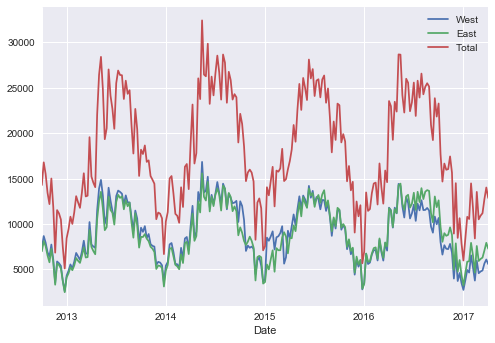

In [4]:
data.resample('W').sum().plot()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


(0, 44110.330220685137)

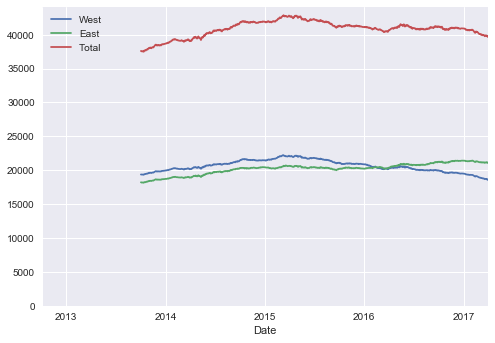

In [5]:
# check for year trends by using rolling windows - sum in the previous 365 days
ax = data.resample('D').rolling(365).sum().plot()
ax.set_ylim(0, None)

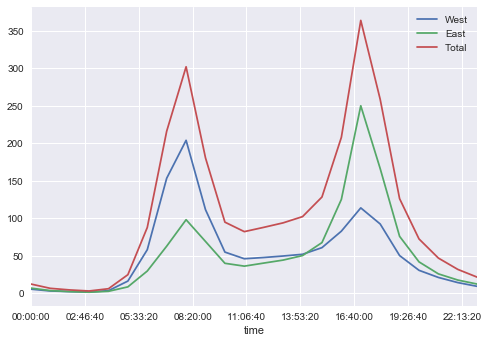

In [6]:
# are there any time patterns?
data.groupby(data.index.time).mean().plot()

In [7]:
# see the same, but year-wise, using a pivot table
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5] #each column is a day, each row is a time

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


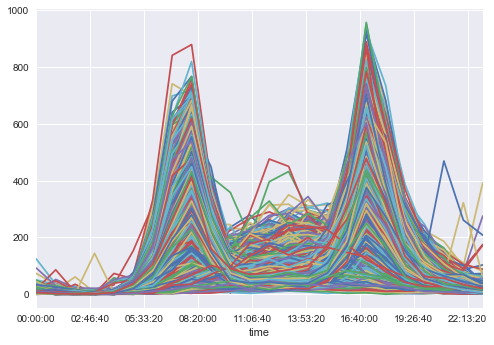

In [8]:
pivoted.plot(legend=False) #we now have a line for each day

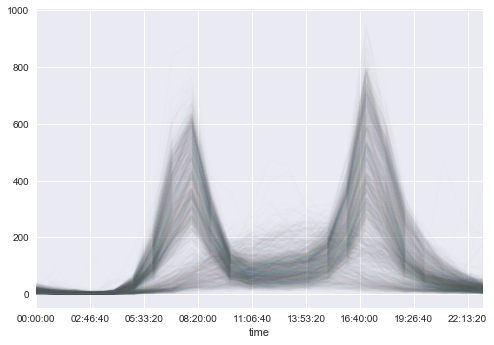

In [9]:
pivoted.plot(legend=False, alpha=0.01) #better looking
#some days have a bimodal pattern, some have not -> weekdays vs weekends/holidays?

In [11]:
#this prints the docs  
get_fremont_data?

In [ ]:
#shift+tab will get params
get_fremont_data()